# Trabajo Final de Señales 3 
##Alejandro Estrada, Angel Ospina, Jesus Rafel Moreno

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go



import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier,  LocalOutlierFactor 
from sklearn.decomposition import PCA 
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

#Others
import warnings
warnings.filterwarnings('ignore') 


from google.colab import files
uploaded = files.upload() 

Saving heart.csv to heart.csv


Librarias que se importan para poder implementar el codigo. 

In [2]:
data = pd.read_csv('heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
print(len(data)) 
print('Data Shape',data.shape)

303
Data Shape (303, 14)


In [4]:
describe = data.describe()
print(describe.T) # realiza un estudio de las observaciones de cada etiqueta 

          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277

In [5]:
data[:50]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


1    165
0    138
Name: target, dtype: int64


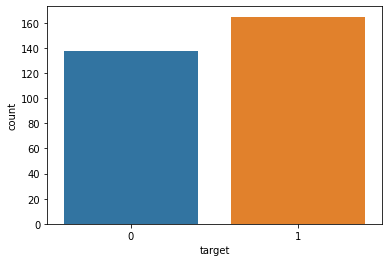

In [6]:
sns.countplot(data['target']) 
print(data.target.value_counts())


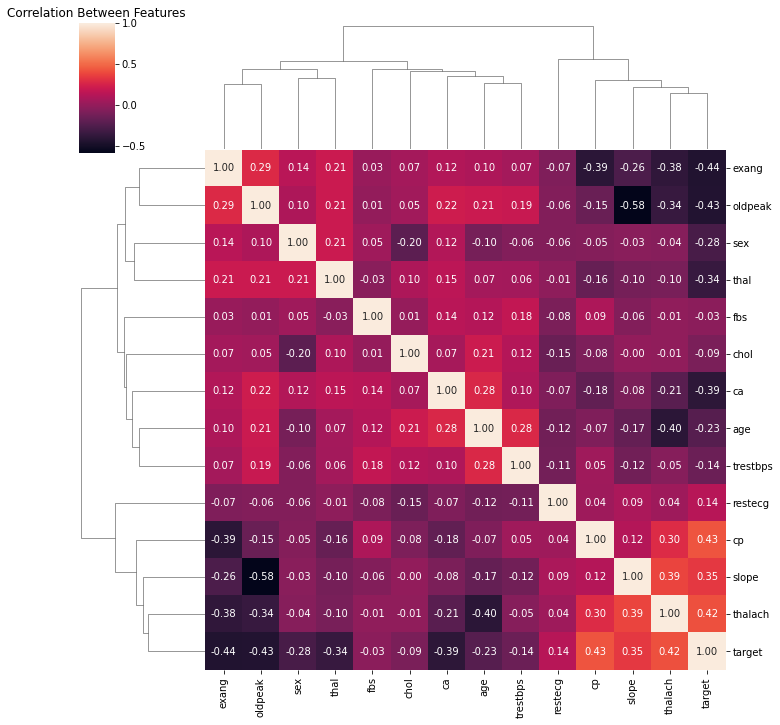

In [7]:
corr_data = data.corr() #Examina la correlación entre los valores numéricos de los datos.
sns.clustermap(corr_data,annot= True,fmt = '.2f') #Mientras que #annot muestra los valores numéricos en el gráfico, fmt determina cuántos dígitos se mostrarán después de la coma.
plt.title('Correlation Between Features')
plt.show()

age         False
sex          True
cp           True
trestbps    False
chol        False
fbs         False
restecg     False
thalach      True
exang        True
oldpeak      True
slope        True
ca           True
thal         True
target       True
Name: target, dtype: bool


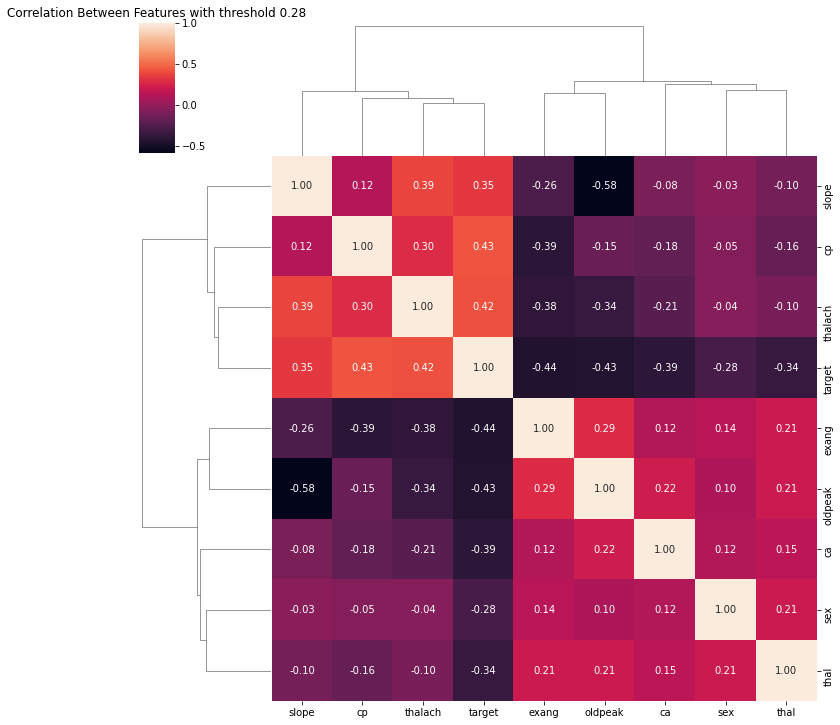

In [8]:
threshold = 0.28 #Con este valor de umbral, solo evaluaremos las correlaciones por encima de este valor en el nuevo gráfico.


filtre = np.abs(corr_data['target']) > threshold #Dado que los valores de correlación serán negativos aquí, tomamos el valor absoluto y filtramos los mayores que el umbral.

print(filtre)

corr_feature = corr_data.columns[filtre].tolist() # A esta variable, convertimos las salidas obtenidas aplicando el filtro a las columnas de la matriz de correlación, y las asignamos a la lista.

sns.clustermap(data[corr_feature].corr(),annot= True,fmt = '.2f')

plt.title('Correlation Between Features with threshold 0.28')
plt.show();

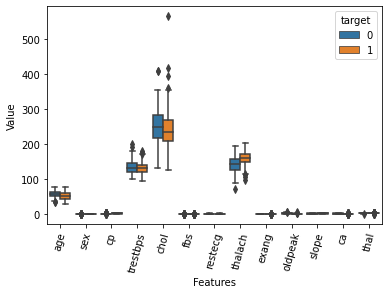

In [9]:
data_melted = pd.melt(data,id_vars='target',var_name='Features',value_name='Value')


plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) 
plt.xticks(rotation=75) 
plt.show()

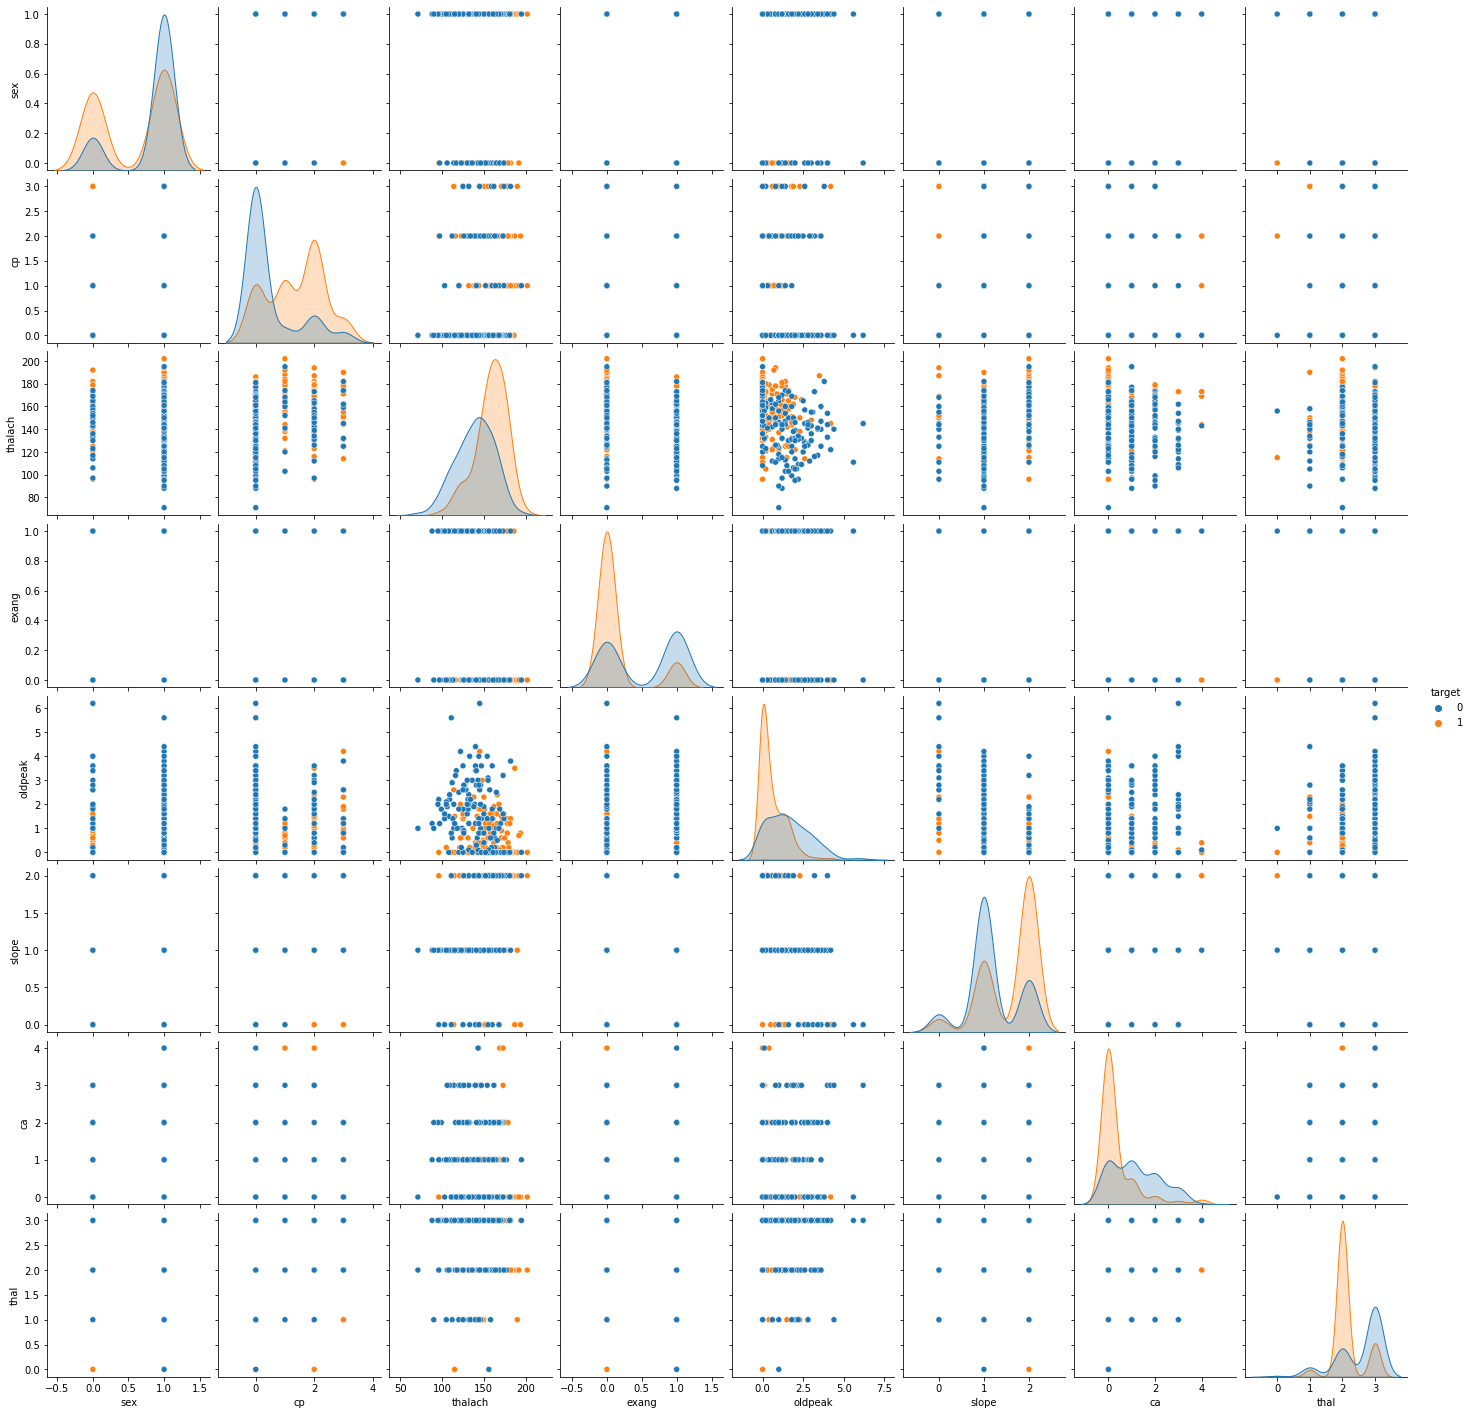

In [10]:
sns.pairplot(data[corr_feature],hue='target')
plt.show()

In [11]:
x = data.drop(['target'],axis=1) 
y = data.target
columns = x.columns.tolist() # Hemos reunido los nombres de las etiquetas en una lista.


In [12]:
test_size = 0.2
x = RobustScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

Este escalador elimina la mediana y escala los datos de acuerdo con el rango de cuantiles (el valor predeterminado es IQR: rango intercuartílico). El IQR es el rango entre el primer cuartil (cuantil 25) y el tercer cuartil (cuantil 75).

El centrado y el escalado ocurren de forma independiente en cada función al calcular las estadísticas relevantes en las muestras del conjunto de entrenamiento. A continuación, se almacenan la mediana y el rango intercuartílico para utilizarlos en datos posteriores mediante el método de transformación.

La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático. Normalmente, esto se hace eliminando la media y escalando a la varianza unitaria. Sin embargo, los valores atípicos a menudo pueden influir en la media / varianza de la muestra de forma negativa. En tales casos, la mediana y el rango intercuartílico suelen dar mejores resultados.

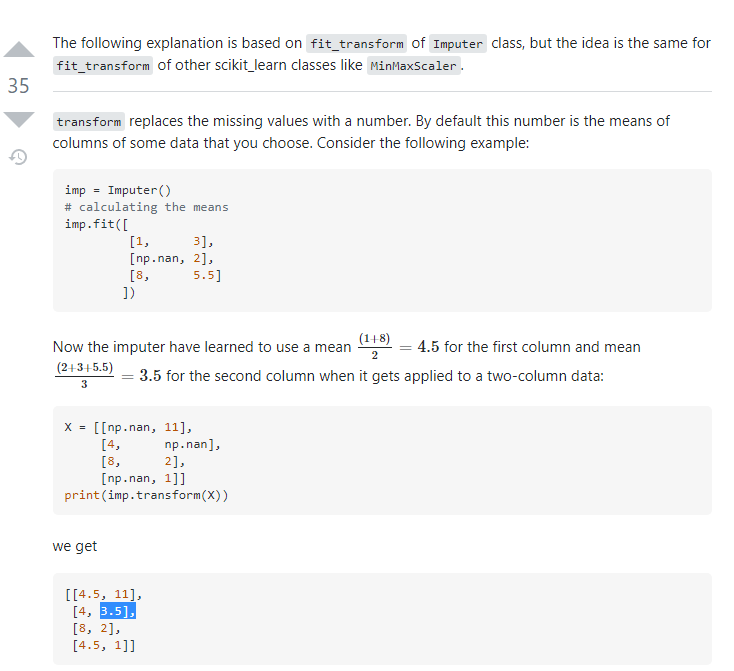

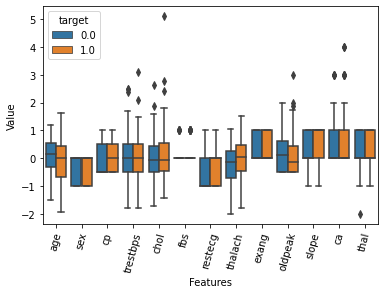

In [13]:
x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

#recuadro p. requiere una operación pre-fundida

data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')
plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) #Las funciones están separadas por destino.
plt.xticks(rotation=75) 
plt.show()

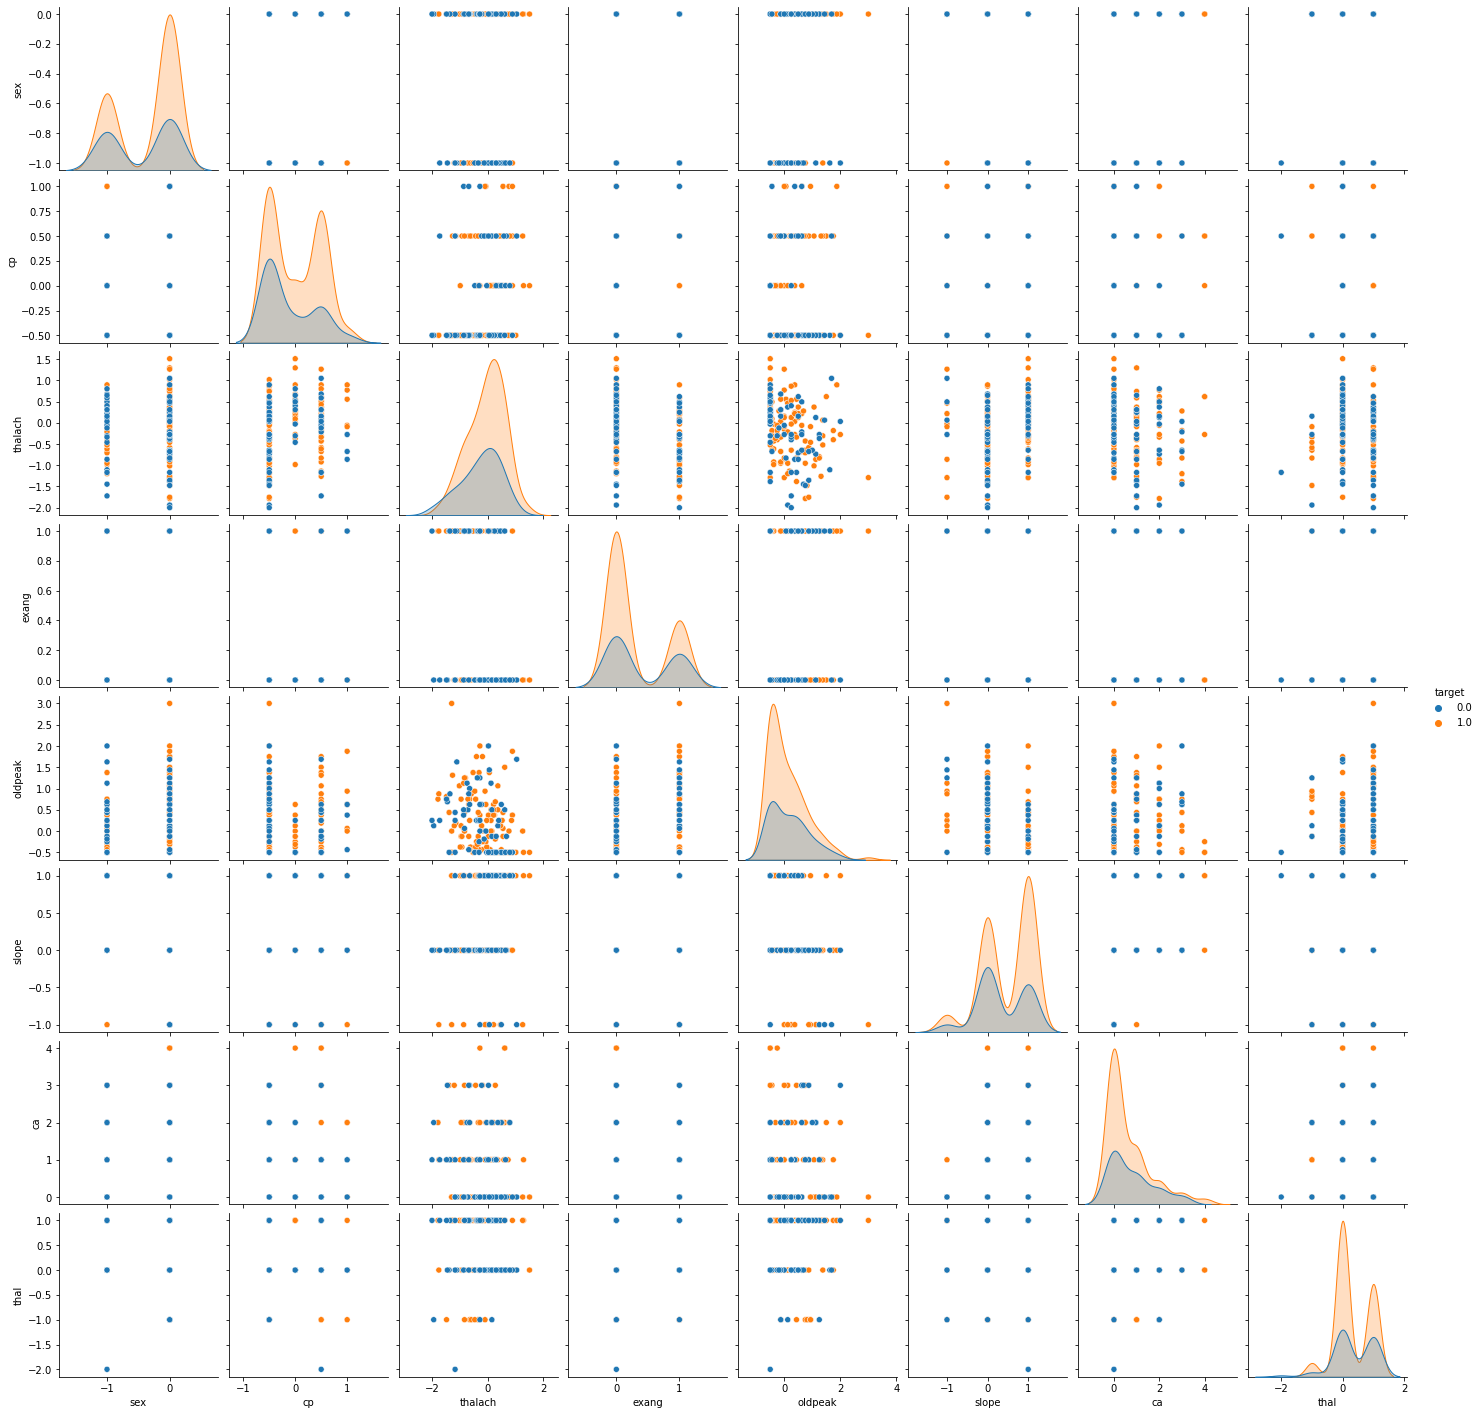

In [14]:
sns.pairplot(x_train_df[corr_feature],hue='target',palette='tab10')
plt.show()

#K-nearest neighbors classifier

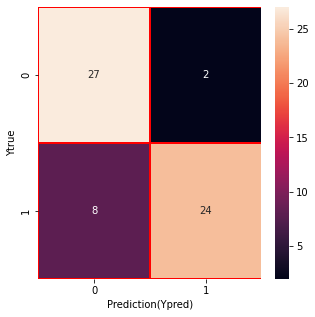

Score: 0.8360655737704918
CM: [[27  2]
 [ 8 24]]
Basic KNN Acc: 0.8360655737704918


In [15]:
random_state = 42
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train) #Calculation (In the supervise learning this section = training)
y_predict = knn.predict(x_test) #Test Section
cm = confusion_matrix(y_test, y_predict) #Plooting


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()


acc = accuracy_score(y_test, y_predict) #Accuracy Score
score = knn.score(x_test, y_test) #Acc y aquí tendrá el mismo resultado. Es para fines de verificación.

print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)

In [16]:
k_range = list(range(1,51)) #Encontrar el valor k óptimo
weight_options = ['uniform','distance'] #Encontrar el peso más adecuado
#manhattan_distance = 1
#euclidean_distance = 2
distance_options = [1,2] #Encontrar el tipo de distancia más adecuado
print()
param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) #Hemos recopilado los parámetros para buscar en un diccionario.
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [17]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,51)) #Encontrar el valor k óptimo
    weight_options = ['uniform','distance'] #Encontrar el peso más adecuado
    #manhattan_distance = 1
    #euclidean_distance = 2
    distance_options = [1,2] #Encontrar el tipo de distancia más adecuado
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) #Hemos recopilado los parámetros para buscar en un diccionario.

    knn =KNeighborsClassifier() #Se ha creado el lugar donde se probarán los parámetros.
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') #Método de búsqueda de parámetros
    grid.fit(x_train, y_train) #mejor parm. adquirido
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) #Para operación de prueba en el equipo de prueba
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

grid_knn_bestparam = KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 0.8390000000000001 with parametres: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

Test Score: 0.8688524590163934, Train Score: 0.8884297520661157

CM Test: [[25  4]
 [ 4 28]]
CM Train: [[ 93  16]
 [ 11 122]]


In [18]:
knn_score=grid_knn_bestparam.score(x_test,y_test)

# Principal component analysis

Text(0.5, 1.0, 'PCA: C1 Vs C2')

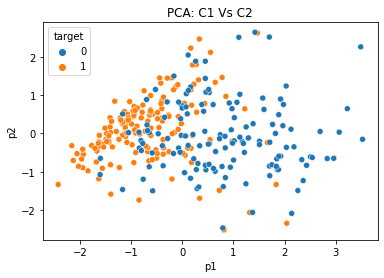

In [19]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x) #Los datos x se escalaron exactamente para PCA sin dividir.

pca = PCA(n_components=2) #Creamos un PCA con 2 componentes.
pca.fit(x_scaled)
x_reduce_pca = pca.transform(x_scaled) #x reducido a 2
pca_data =pd.DataFrame(x_reduce_pca,columns=['p1','p2']) #Creó un marco de datos para inspeccionar desde reducir datos
pca_data['target'] = y #objetivo añadido. Requerido para visualización

sns.scatterplot(x='p1',y='p2',hue='target',data=pca_data) # gráfico coloreado según etiqueta
plt.title('PCA: C1 Vs C2')

In [20]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduce_pca,y,test_size=test_size,random_state=42)
grid_pca = KNN_best_parameters(x_train_pca, x_test_pca, y_train_pca, y_test_pca)


Best training score: 0.7816666666666666 with parametres: {'n_neighbors': 49, 'p': 2, 'weights': 'uniform'}

Test Score: 0.7868852459016393, Train Score: 0.7768595041322314

CM Test: [[24  5]
 [ 8 24]]
CM Train: [[ 71  38]
 [ 16 117]]


Text(0.5, 1.0, "2-Class classification (k = 49, weights = 'uniform')")

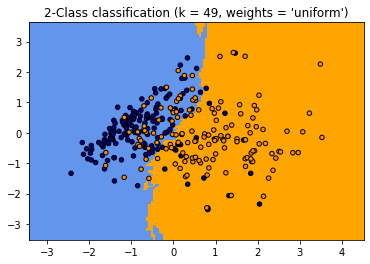

In [21]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh, si lo pongo mas pequeño se demora mucho mas en compilar
X = x_reduce_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
#Hasta aqui hace la separacion de las clases 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))


SVM Test Accuracy: 0.8524590163934426
SVM Train Accuracy: 0.9132231404958677


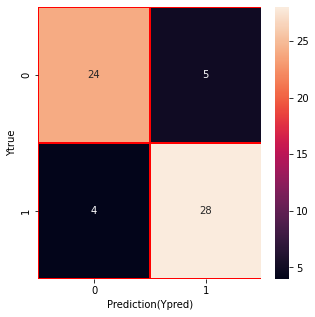

In [22]:
#Ahora usando maquina de soporte vectorial

svc = SVC()
svc.fit(x_train,y_train)  #learning 
#SVM Test 

SVMscore_test = svc.score(x_test,y_test)
SVMscore_train = svc.score(x_train,y_train)
print ("SVM Test Accuracy:", svc.score(x_test,y_test))

print ("SVM Train Accuracy:", svc.score(x_train,y_train))

yprediciton2= svc.predict(x_test)
ytrue = y_test

CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

Decision Tree Test Score:  0.8524590163934426
Decision Tree Train Score:  0.8842975206611571


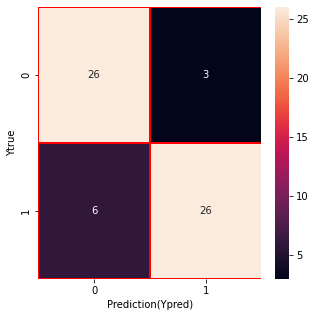

In [23]:
#Decision tree classifier

dt = DecisionTreeClassifier(random_state=random_state,max_depth=4)

dt.fit(x_train,y_train) #learning
#prediciton
DTCscore_test = dt.score(x_test,y_test)
DTCscore_train = dt.score(x_train,y_train)
print("Decision Tree Test Score: ",dt.score(x_test,y_test))
print("Decision Tree Train Score: ",dt.score(x_train,y_train))


yprediciton2= dt.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

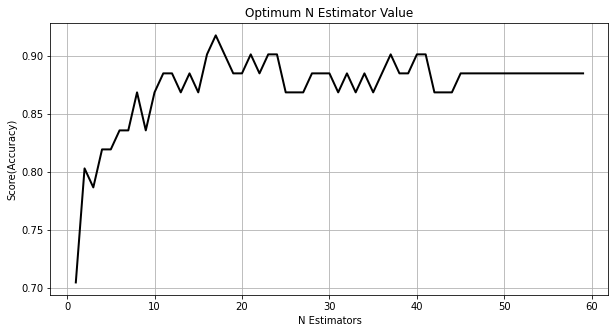

In [24]:
#RandomForest primero se debe obtener una el N optimo para obtner el mejor accuracy

scores = []
for each in range(1,60):
    rf = RandomForestClassifier(n_estimators = each,random_state=random_state,max_depth=3)
    rf.fit(x_train,y_train)
    scores.append(rf.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,60),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

Random Forest Test Score:  0.9180327868852459
Random Forest Train Score:  0.8801652892561983


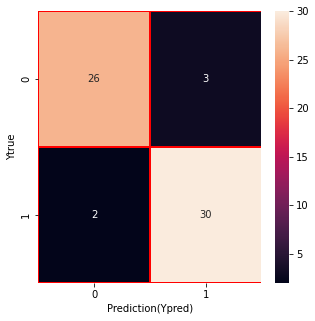

In [25]:
rf= RandomForestClassifier(n_estimators = 17, random_state=random_state,max_depth=3) #n_estimator = DT
rf.fit(x_train,y_train) # learning
RFCscore=rf.score(x_test,y_test)

print("Random Forest Test Score: ",rf.score(x_test,y_test))
print("Random Forest Train Score: ",rf.score(x_train,y_train))

yprediciton2= rf.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

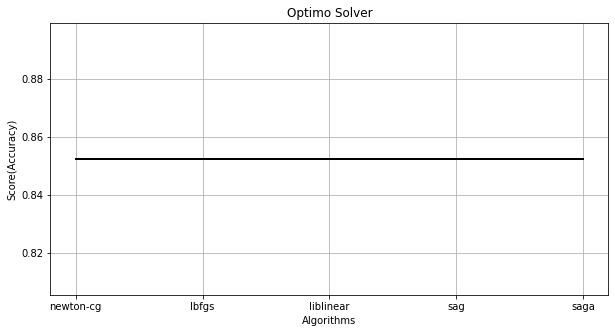

LR Test Accuracy 0.8524590163934426
LR Train Accuracy 0.8636363636363636


In [26]:
#Regresión Logistica
#LR with sklearn
from sklearn.linear_model import LogisticRegression
'''LR = LogisticRegression()
LR.fit(x_train,y_train)
print("LR Test Accuracy {}".format(LR.score(x_test,y_test)))
print("LR Train Accuracy {}".format(LR.score(x_train,y_train)))
LRscore =LR.score(x_test,y_test)'''

listSolver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ]

scores2=[]
for each in listSolver:
    LR = LogisticRegression(solver=each)
    LR.fit(x_train,y_train)
    scores2.append(LR.score(x_test,y_test))
plt.figure(1, figsize=(10, 5))
plt.plot(listSolver,scores2,color="black",linewidth=2)
plt.title("Optimo Solver")
plt.xlabel("Algorithms")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()


LR = LogisticRegression()
LR.fit(x_train,y_train)
print("LR Test Accuracy {}".format(LR.score(x_test,y_test)))
print("LR Train Accuracy {}".format(LR.score(x_train,y_train)))
LRscore =LR.score(x_test,y_test)

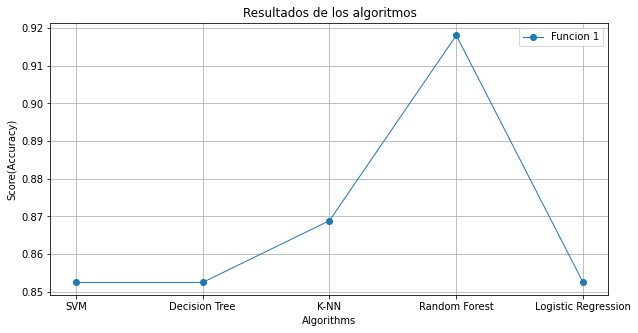

In [27]:

scores=[SVMscore_test,DTCscore_test,knn_score,RFCscore,LRscore]
AlgorthmsName=["SVM","Decision Tree","K-NN","Random Forest","Logistic Regression"]


plt.figure(1, figsize=(10, 5))
plt.plot(AlgorthmsName,scores,'o-',linewidth=1,)
plt.legend(('Funcion 1', 'Funcion 2', 'Funcion 3'),prop = {'size': 10}, loc='upper right')
plt.title("Resultados de los algoritmos")
plt.xlabel("Algorithms")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()
